In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("crime_safety_dataset.csv")
df.head()

,id,date,time,crime_type,city,state,location_description,victim_age,victim_gender,victim_race
0,1,2022-09-09,18:58:57,Homicide,Philadelphia,PA,9916 Broadway,34,Male,Other
1,2,2022-07-10,12:10:59,Assault,Phoenix,AZ,6853 Oak St,13,Female,Black
2,3,2024-12-31,09:26:12,Burglary,San Antonio,TX,3760 Maple Ave,23,Male,Asian
3,4,2024-04-12,23:17:28,Vandalism,Philadelphia,PA,6781 Main St,36,Other,Asian
4,5,2023-07-19,04:49:39,Fraud,San Antonio,TX,3239 Broadway,26,Other,Other


In [4]:
df.tail()

,id,date,time,crime_type,city,state,location_description,victim_age,victim_gender,victim_race
995,996,2023-02-23,07:24:57,Assault,New York,NY,2793 Oak St,72,Female,Asian
996,997,2024-10-15,18:10:35,Drug Offense,San Jose,CA,2798 Elm St,26,Male,Other
997,998,2024-02-08,04:00:11,Assault,Houston,TX,8950 Pine St,34,Non-binary,Hispanic
998,999,2023-01-18,16:52:36,Homicide,Chicago,IL,4673 Oak St,16,Other,Hispanic
999,1000,2022-07-19,01:28:45,Homicide,Los Angeles,CA,5226 Oak St,54,Male,White


In [5]:
df.shape

(1000, 10)

In [6]:
df.columns

Index(['id', 'date', 'time', 'crime_type', 'city', 'state',
       'location_description', 'victim_age', 'victim_gender', 'victim_race'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    1000 non-null   int64 
 1   date                  1000 non-null   object
 2   time                  1000 non-null   object
 3   crime_type            1000 non-null   object
 4   city                  1000 non-null   object
 5   state                 1000 non-null   object
 6   location_description  1000 non-null   object
 7   victim_age            1000 non-null   int64 
 8   victim_gender         1000 non-null   object
 9   victim_race           1000 non-null   object
dtypes: int64(2), object(8)
memory usage: 78.3+ KB


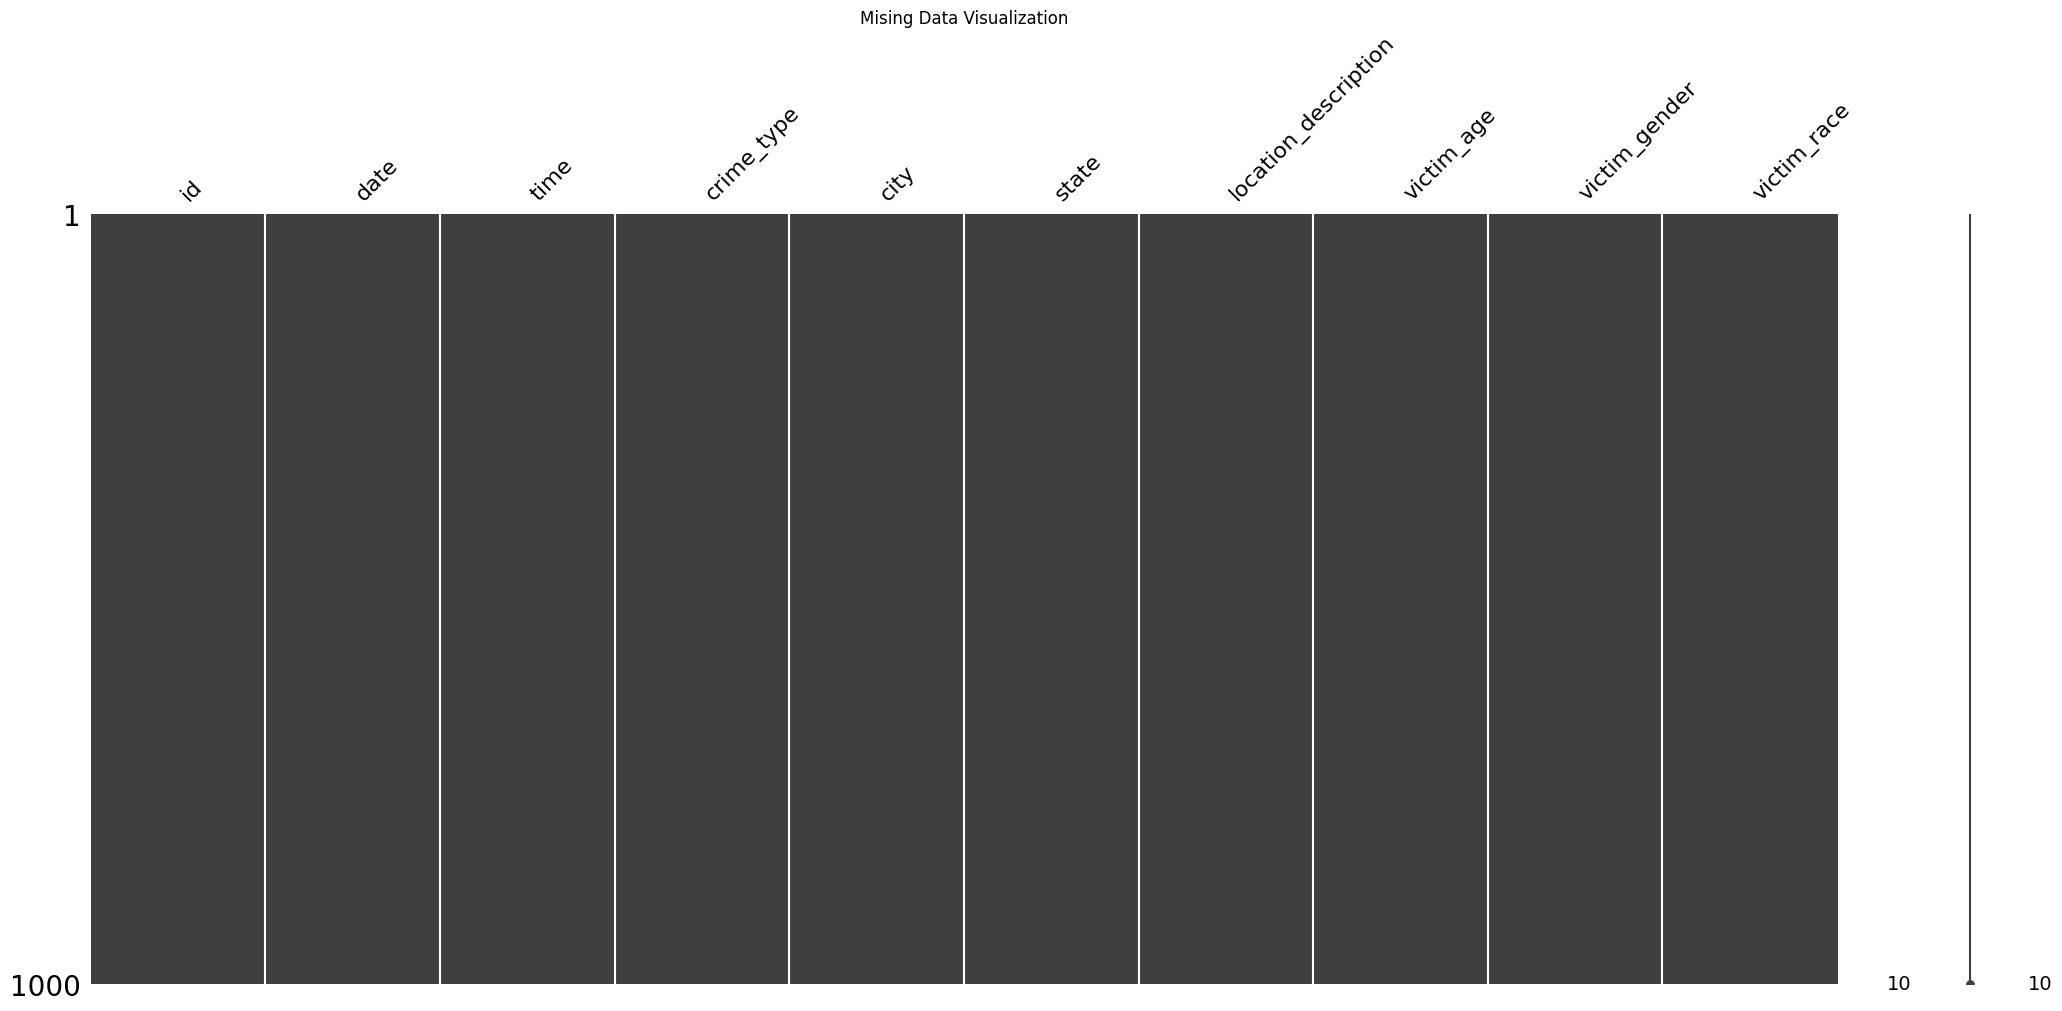

In [8]:
msno.matrix(df)
plt.title("Mising Data Visualization")
plt.show()

In [9]:
df["datetime"] = pd.to_datetime(df["date"] + " " + df["time"])

df["hour"] = df["datetime"].dt.hour
df["dayofweek"] = df["datetime"].dt.dayofweek
df["month"] = df["datetime"].dt.month
df["year"] = df["datetime"].dt.year

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    1000 non-null   int64         
 1   date                  1000 non-null   object        
 2   time                  1000 non-null   object        
 3   crime_type            1000 non-null   object        
 4   city                  1000 non-null   object        
 5   state                 1000 non-null   object        
 6   location_description  1000 non-null   object        
 7   victim_age            1000 non-null   int64         
 8   victim_gender         1000 non-null   object        
 9   victim_race           1000 non-null   object        
 10  datetime              1000 non-null   datetime64[ns]
 11  hour                  1000 non-null   int32         
 12  dayofweek             1000 non-null   int32         
 13  month              

In [11]:
df.head()

,id,date,time,crime_type,city,state,location_description,victim_age,victim_gender,victim_race,datetime,hour,dayofweek,month,year
0,1,2022-09-09,18:58:57,Homicide,Philadelphia,PA,9916 Broadway,34,Male,Other,2022-09-09 18:58:57,18,4,9,2022
1,2,2022-07-10,12:10:59,Assault,Phoenix,AZ,6853 Oak St,13,Female,Black,2022-07-10 12:10:59,12,6,7,2022
2,3,2024-12-31,09:26:12,Burglary,San Antonio,TX,3760 Maple Ave,23,Male,Asian,2024-12-31 09:26:12,9,1,12,2024
3,4,2024-04-12,23:17:28,Vandalism,Philadelphia,PA,6781 Main St,36,Other,Asian,2024-04-12 23:17:28,23,4,4,2024
4,5,2023-07-19,04:49:39,Fraud,San Antonio,TX,3239 Broadway,26,Other,Other,2023-07-19 04:49:39,4,2,7,2023


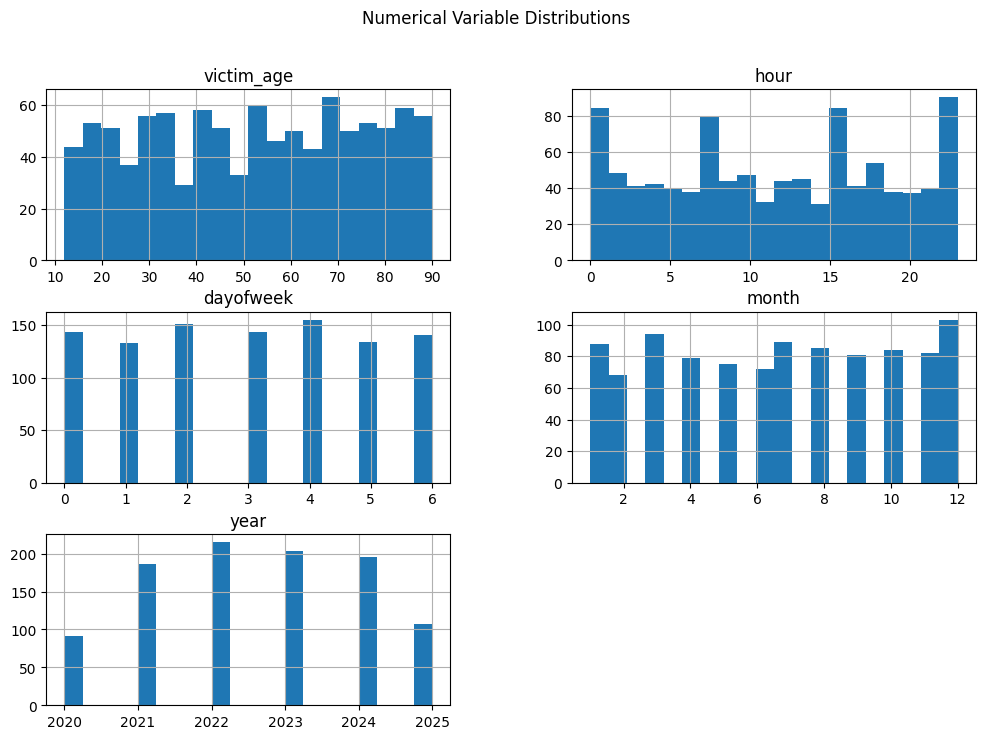

In [12]:
numeric_cols = ["victim_age", "hour", "dayofweek", "month", "year"]

df[numeric_cols].hist(bins=20, figsize=(12,8))
plt.suptitle("Numerical Variable Distributions")
plt.show()

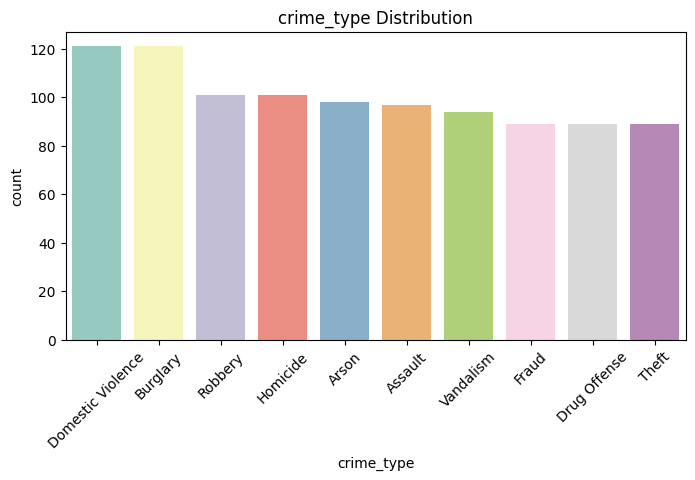

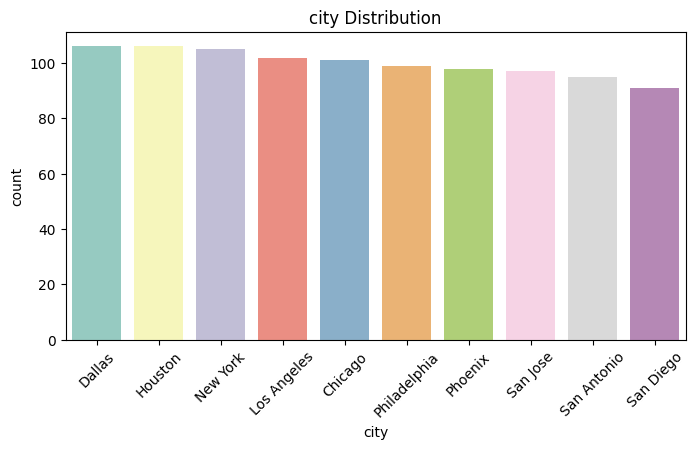

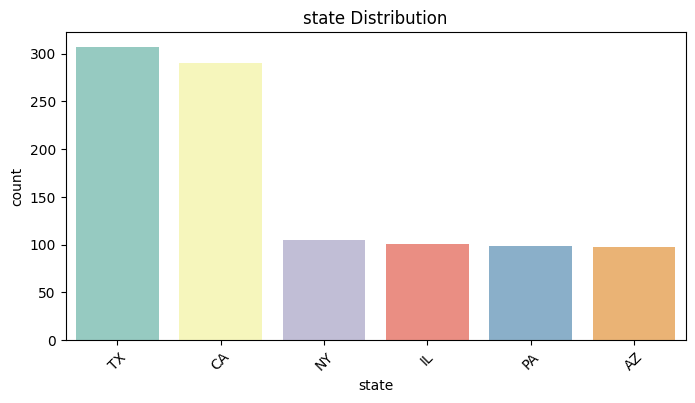

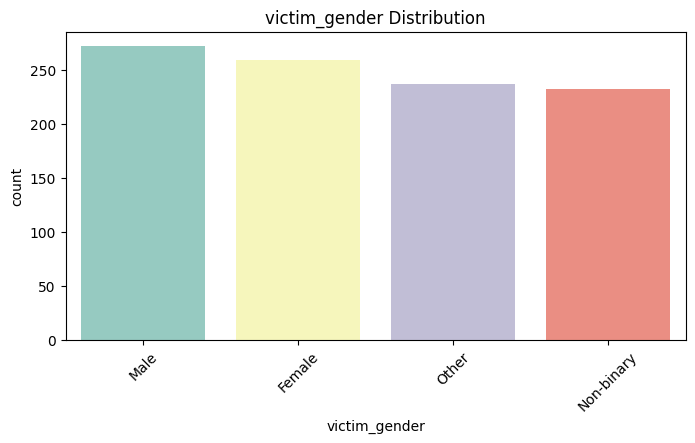

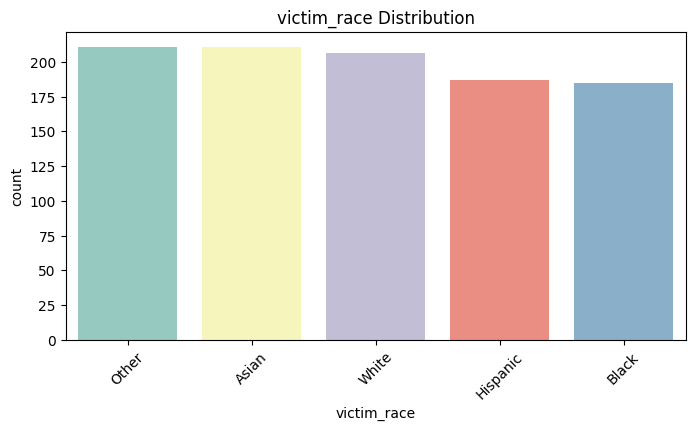

In [13]:
categorical_cols = ["crime_type", "city", "state", "victim_gender", "victim_race"]

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette="Set3")
    plt.title(f"{col} Distribution")
    plt.xticks(rotation=45)
    plt.show()

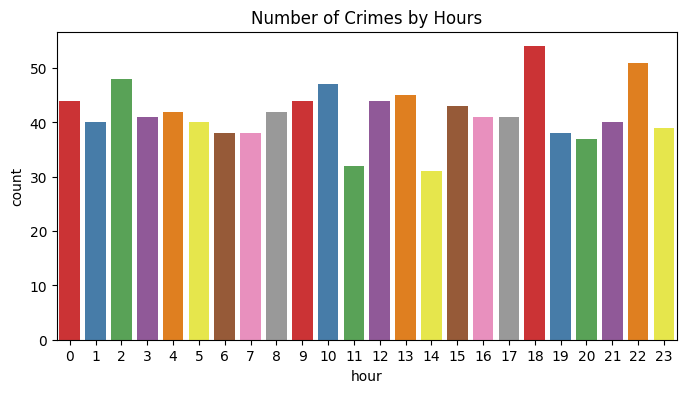

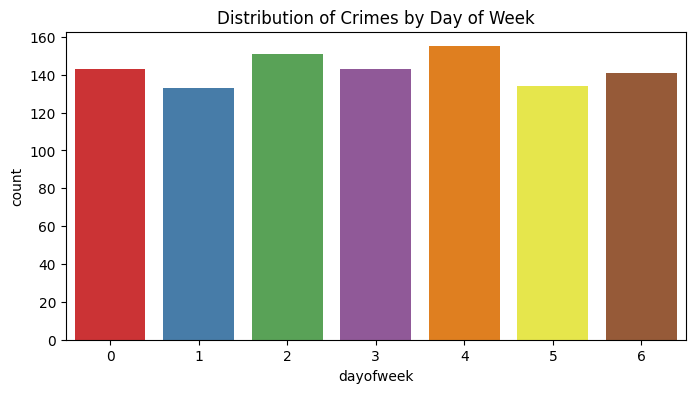

In [14]:
plt.figure(figsize=(8,4))
sns.countplot(x="hour", data=df, palette="Set1")
plt.title("Number of Crimes by Hours")
plt.show()

plt.figure(figsize=(8,4))
sns.countplot(x="dayofweek", data=df, palette="Set1")
plt.title("Distribution of Crimes by Day of Week")
plt.show()

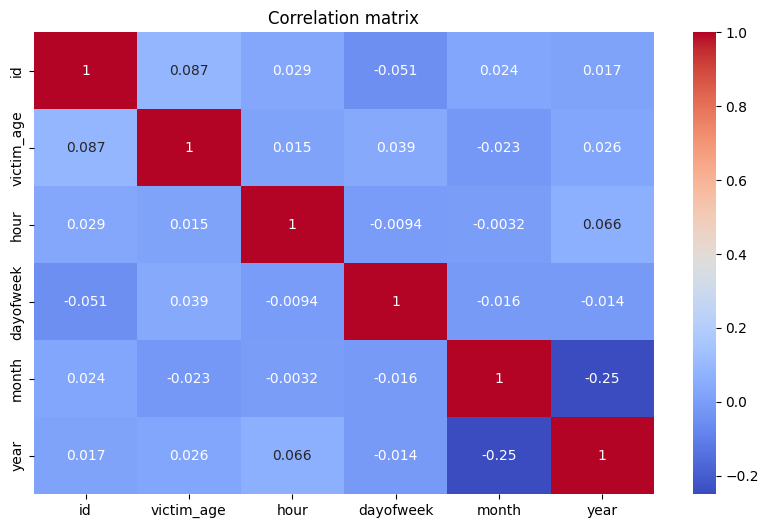

In [15]:
plt.figure(figsize=(10,6))
plt.title("Correlation matrix")
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

### IMO this Heatmap is Useless, REASON: correaltions are nearly 0, dosent tell anything useful

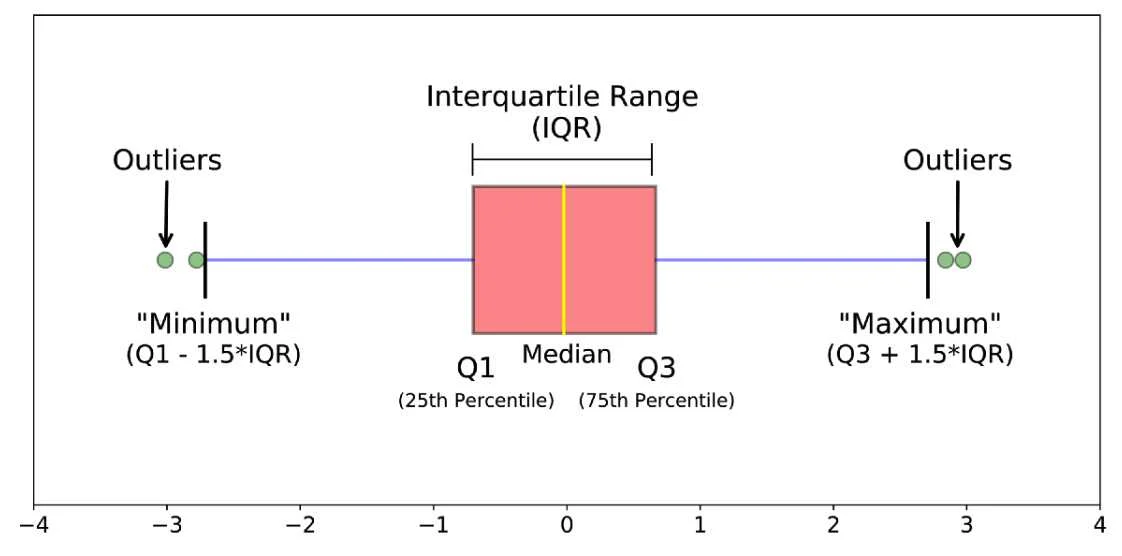

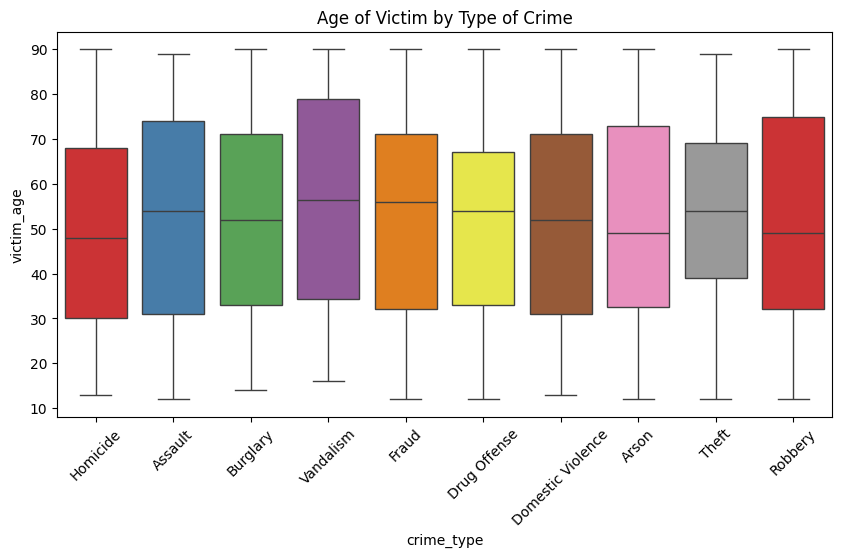

In [16]:
plt.figure(figsize=(10,5))
sns.boxplot(x="crime_type", y="victim_age", data=df, palette="Set1")
plt.title("Age of Victim by Type of Crime")
plt.xticks(rotation=45)
plt.show()

In [17]:
df.groupby("crime_type")["victim_age"].describe()

,count,mean,std,min,25%,50%,75%,max
crime_type,,,,,,,,
Arson,98.0,52.142857,23.478878,12.0,32.50,49.0,73.0,90.0
Assault,97.0,52.515464,23.691645,12.0,31.00,54.0,74.0,89.0
Burglary,121.0,52.074380,23.558496,14.0,33.00,52.0,71.0,90.0
Domestic Violence,121.0,50.818182,23.004710,13.0,31.00,52.0,71.0,90.0
Drug Offense,89.0,51.033708,21.590428,12.0,33.00,54.0,67.0,90.0
Fraud,89.0,52.483146,21.993859,12.0,32.00,56.0,71.0,90.0
Homicide,101.0,49.475248,22.433722,13.0,30.00,48.0,68.0,90.0
Robbery,101.0,52.009901,24.018116,12.0,32.00,49.0,75.0,90.0
Theft,89.0,53.719101,21.303536,12.0,39.00,54.0,69.0,89.0


In [18]:
crime_ratios = df.groupby("city")["crime_type"].value_counts(normalize=True).unstack().fillna(0).round(2)

crime_total = df["city"].value_counts()
crime_ratios["total crimes"] = crime_total
crime_ratios

crime_type,Arson,Assault,Burglary,Domestic Violence,Drug Offense,Fraud,Homicide,Robbery,Theft,Vandalism,total crimes
city,,,,,,,,,,,
Chicago,0.04,0.09,0.14,0.13,0.09,0.13,0.09,0.10,0.09,0.11,101
Dallas,0.10,0.06,0.18,0.07,0.13,0.08,0.10,0.08,0.11,0.09,106
Houston,0.10,0.11,0.12,0.10,0.07,0.08,0.12,0.13,0.09,0.06,106
Los Angeles,0.11,0.16,0.09,0.17,0.05,0.06,0.11,0.09,0.07,0.11,102
New York,0.12,0.09,0.12,0.10,0.05,0.08,0.12,0.10,0.10,0.12,105
Philadelphia,0.10,0.07,0.12,0.08,0.14,0.13,0.11,0.05,0.10,0.09,99
Phoenix,0.11,0.06,0.13,0.11,0.06,0.09,0.10,0.13,0.08,0.11,98
San Antonio,0.09,0.08,0.05,0.16,0.11,0.13,0.04,0.13,0.13,0.08,95
San Diego,0.09,0.12,0.11,0.19,0.11,0.07,0.05,0.09,0.07,0.11,91


In [19]:
crime_counts = df.groupby("city")["crime_type"].value_counts().unstack().fillna(0).astype(int)

crime_counts["total_crimes"] = crime_counts.sum(axis=1)
crime_counts

crime_type,Arson,Assault,Burglary,Domestic Violence,Drug Offense,Fraud,Homicide,Robbery,Theft,Vandalism,total_crimes
city,,,,,,,,,,,
Chicago,4,9,14,13,9,13,9,10,9,11,101
Dallas,11,6,19,7,14,8,11,8,12,10,106
Houston,11,12,13,11,7,9,13,14,10,6,106
Los Angeles,11,16,9,17,5,6,11,9,7,11,102
New York,13,9,13,10,5,8,13,11,10,13,105
Philadelphia,10,7,12,8,14,13,11,5,10,9,99
Phoenix,11,6,13,11,6,9,10,13,8,11,98
San Antonio,9,8,5,15,10,12,4,12,12,8,95
San Diego,8,11,10,17,10,6,5,8,6,10,91


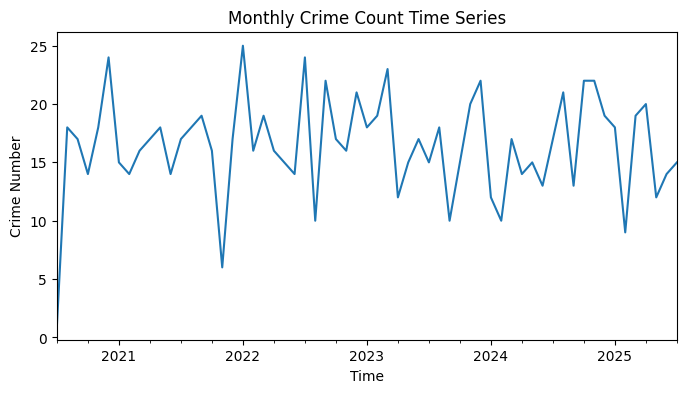

In [20]:
df.set_index("datetime", inplace=True)

plt.figure(figsize=(8,4))
df["crime_type"].resample("M").count().plot()
plt.title("Monthly Crime Count Time Series")
plt.ylabel("Crime Number")
plt.xlabel("Time")
plt.show()

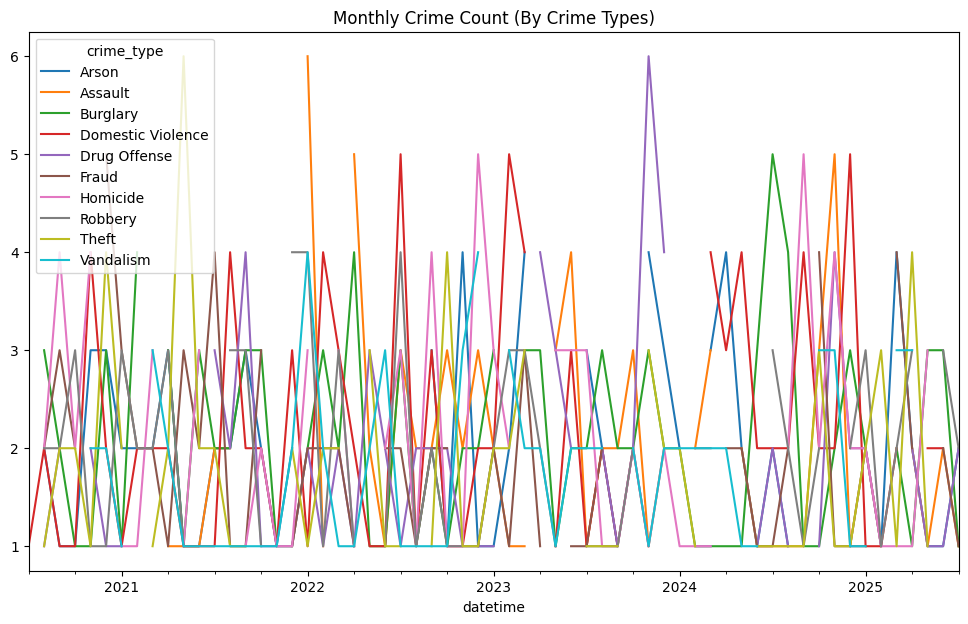

In [21]:
# If you want each type of crime to be drawn separately:abs

df.groupby([pd.Grouper(freq="M"), "crime_type"]).size().unstack().plot(figsize=(12,7))
plt.title("Monthly Crime Count (By Crime Types)")
plt.show()

In [26]:
df.head()

,id,date,time,crime_type,city,state,location_description,victim_age,victim_gender,victim_race,hour,dayofweek,month,year
datetime,,,,,,,,,,,,,,
2022-09-09 18:58:57,1,2022-09-09,18:58:57,Homicide,Philadelphia,PA,9916 Broadway,34,Male,Other,18,4,9,2022
2022-07-10 12:10:59,2,2022-07-10,12:10:59,Assault,Phoenix,AZ,6853 Oak St,13,Female,Black,12,6,7,2022
2024-12-31 09:26:12,3,2024-12-31,09:26:12,Burglary,San Antonio,TX,3760 Maple Ave,23,Male,Asian,9,1,12,2024
2024-04-12 23:17:28,4,2024-04-12,23:17:28,Vandalism,Philadelphia,PA,6781 Main St,36,Other,Asian,23,4,4,2024
2023-07-19 04:49:39,5,2023-07-19,04:49:39,Fraud,San Antonio,TX,3239 Broadway,26,Other,Other,4,2,7,2023


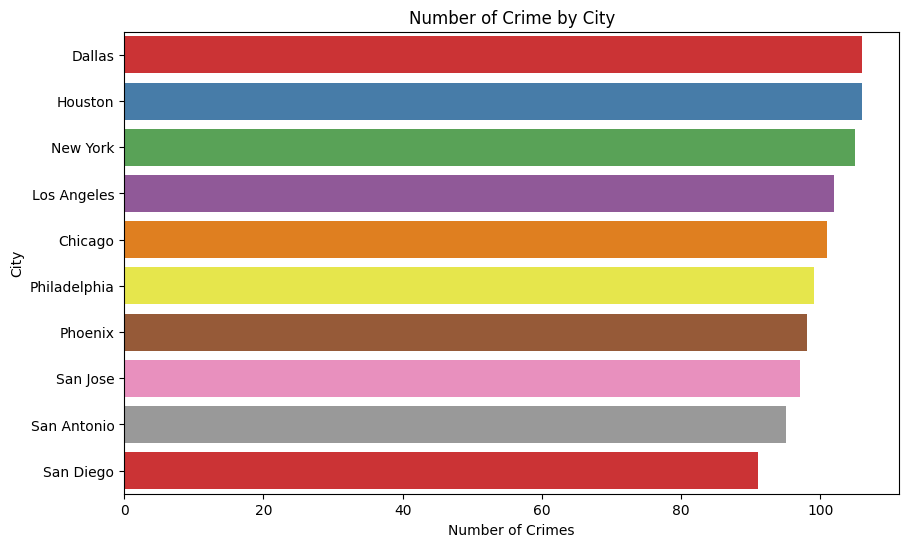

In [36]:
city_crime_counts = df["city"].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=city_crime_counts.values, y=city_crime_counts.index, palette="Set1", orient="h")
plt.title("Number of Crime by City")
plt.xlabel("Number of Crimes")
plt.ylabel("City")
plt.show()

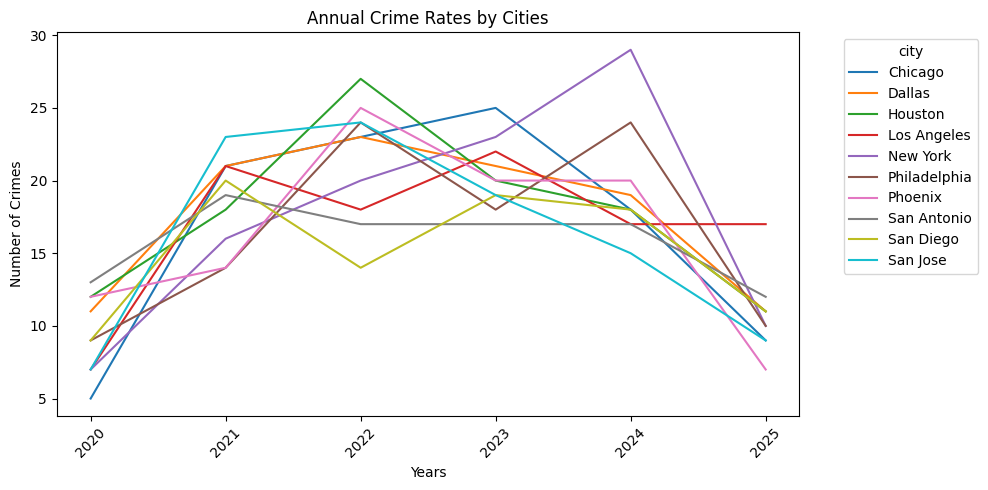

In [56]:
# if 'datetime' not in df.columns:
#     df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])

df["year"] = df["datetime"].dt.year

yearly_crimes_by_city = df.groupby(["city", "year"]).size().reset_index(name="crime_count")

plt.figure(figsize=(10,5))
sns.lineplot(data=yearly_crimes_by_city, x="year", y="crime_count", hue="city", markers="o")

plt.title("Annual Crime Rates by Cities")
plt.xlabel("Years")
plt.xticks(rotation=45)
plt.ylabel("Number of Crimes")
plt.legend(title="city", loc="upper left", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()